In [1]:
import numpy as np 
import pandas as pd

import utils 

import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = True


In [68]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [15]:
import importlib
importlib.reload(utils)

<module 'utils' from '/home/acercyc/projects/Keio Testing_analysis/src/utils.py'>

In [3]:
savepath = utils.Save.savepath('vis_traj')

In [4]:
subj = utils.ExpInfo.getSubjIDs()[0]
task = utils.ExpInfo.taskName[0]

In [5]:
v, _ = utils.LoadData.mouseMovement_array(subj, task)
x, h, y = utils.LoadData.xhy(subj, task)

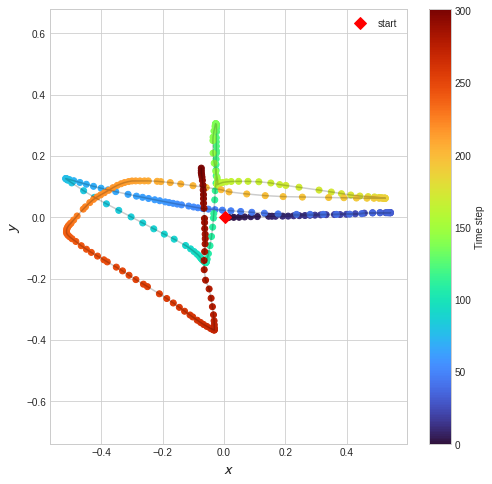

In [69]:
iTrial = 14
vx = v[iTrial][:, 0]
vy = v[iTrial][:, 1]
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
utils.Plot.traj_withColour(vx.cumsum(), vy.cumsum(), fig, ax)
ax.axis('equal')
ax.set_xlabel('$\mathcal{x}$', fontsize=16)
ax.set_ylabel("$\mathcal{y}$", fontsize=16)
fig.savefig(savepath / 'traj_withColour.pdf')

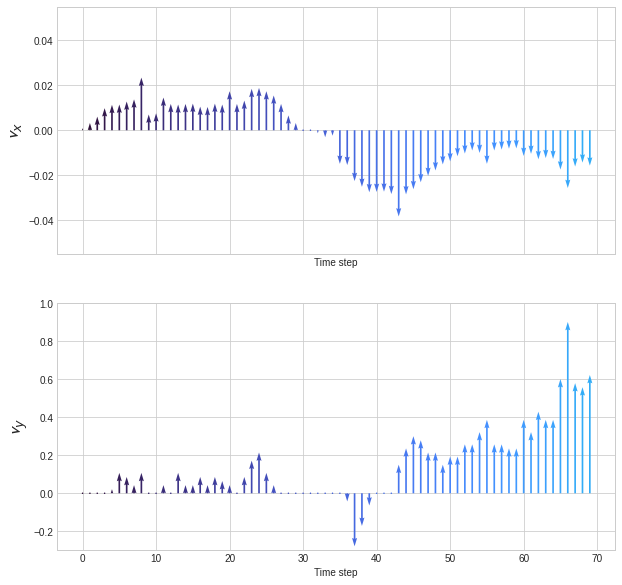

In [67]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey=False)
# colors = np.linspace(0, 1, len(vx))
cmap = plt.get_cmap('turbo')
colors = cmap(np.linspace(0, 1, len(vx)))

head_width = 0.3
head_length = 0.0005

nTime = 70
ax[0].set_xlabel('Time step')
ax[0].set_ylabel("$\mathcal{v}_x$", fontsize=18)
ax[0].quiver(np.arange(nTime), np.zeros(nTime), np.zeros(nTime), vx[:nTime], color=colors[:nTime], width=0.003)
ax[0].xgr

ax[1].set_xlabel('Time step')
ax[1].set_ylabel("$\mathcal{v}_y$", fontsize=18)
ax[1].quiver(np.arange(nTime), np.zeros(nTime), np.zeros(nTime), vy[:nTime], color=colors[:nTime], width=0.003)
ax[1].set_ylim(-0.3, 1)

fig.savefig(savepath / 'traj_withColour_quiver.pdf')
